In [23]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Flatten

In [24]:
(x_train, y_train), (x_test, y_test) = mnist.load_data() #загрузка mnist

In [25]:
#data normalization

x_train = x_train / 255
x_test = x_test / 255


# Преобразование выходных значение в векторы по категориям
y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

<function matplotlib.pyplot.show(close=None, block=None)>

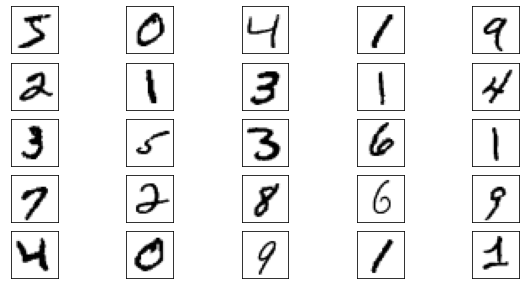

In [26]:
plt.figure(figsize=(10,5))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([]) #hide ticks
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)

plt.show

In [27]:
model = keras.Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

print(model.summary()) #nets structure

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None


In [28]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [29]:
model.fit(x_train, y_train_cat, batch_size=32, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4745 - accuracy: 0.8669 - val_loss: 0.1647 - val_accuracy: 0.9535
Epoch 2/5
1500/1500 [==============================] - 2s 2ms/step - loss: 0.1357 - accuracy: 0.9613 - val_loss: 0.1177 - val_accuracy: 0.9663
Epoch 3/5
1500/1500 [==============================] - 2s 2ms/step - loss: 0.0888 - accuracy: 0.9735 - val_loss: 0.1002 - val_accuracy: 0.9714
Epoch 4/5
1500/1500 [==============================] - 2s 2ms/step - loss: 0.0633 - accuracy: 0.9815 - val_loss: 0.1001 - val_accuracy: 0.9710
Epoch 5/5
1500/1500 [==============================] - 2s 2ms/step - loss: 0.0476 - accuracy: 0.9855 - val_loss: 0.0989 - val_accuracy: 0.9695


In [30]:
model.evaluate(x_test, y_test_cat)

313/313 [==============================] - 1s 1ms/step - loss: 0.0879 - accuracy: 0.9725


[0.08791803568601608, 0.9725000262260437]

[[3.6495868e-07 1.2704405e-09 7.1799994e-05 7.0515171e-08 5.6292596e-05
  1.4227529e-01 8.4849137e-01 1.5483297e-07 9.0633696e-03 4.1260377e-05]]
Распознанная цифра: 6


<function matplotlib.pyplot.show(close=None, block=None)>

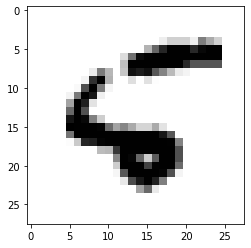

In [37]:
n = 8
x = np.expand_dims(x_test[n], axis=0) #создание трехмерного тензора из одного изображения
res = model.predict(x)
print(res)
print(f'Распознанная цифра: {np.argmax(res)}')

plt.imshow(x_test[n], cmap=plt.cm.binary)
plt.show

In [35]:
#Распознавание всей тестовой выборки

pred = model.predict(x_test)
pred = np.argmax(pred, axis=1)

print(pred.shape)

print(pred[:20])
print(y_test[:20])

(10000,)
[7 2 1 0 4 1 4 9 6 9 0 6 9 0 1 5 9 7 3 4]
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


In [45]:
# collecting incorrect results

mask = pred == y_test
# print(mask[:10])

x_false = x_test[~mask]
p_false = pred[~mask]

print(x_false.shape)

(275, 28, 28)


Значение сети: 6


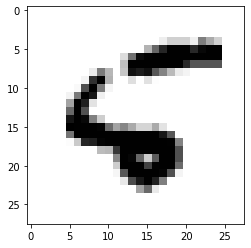

Значение сети: 9


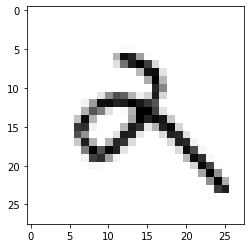

Значение сети: 6


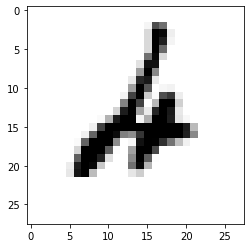

Значение сети: 7


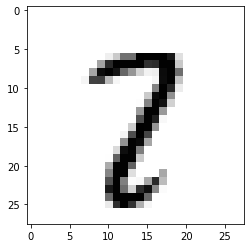

Значение сети: 3


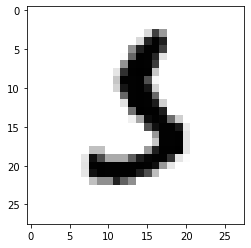

In [48]:
# output incorrect results

for i in range(5):
    print('Значение сети: '+str(p_false[i]))
    plt.imshow(x_false[i], cmap=plt.cm.binary)
    plt.show()